# Medical_Insurance_Price_Prediction


### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Exploratory Data Analysis (EDA)

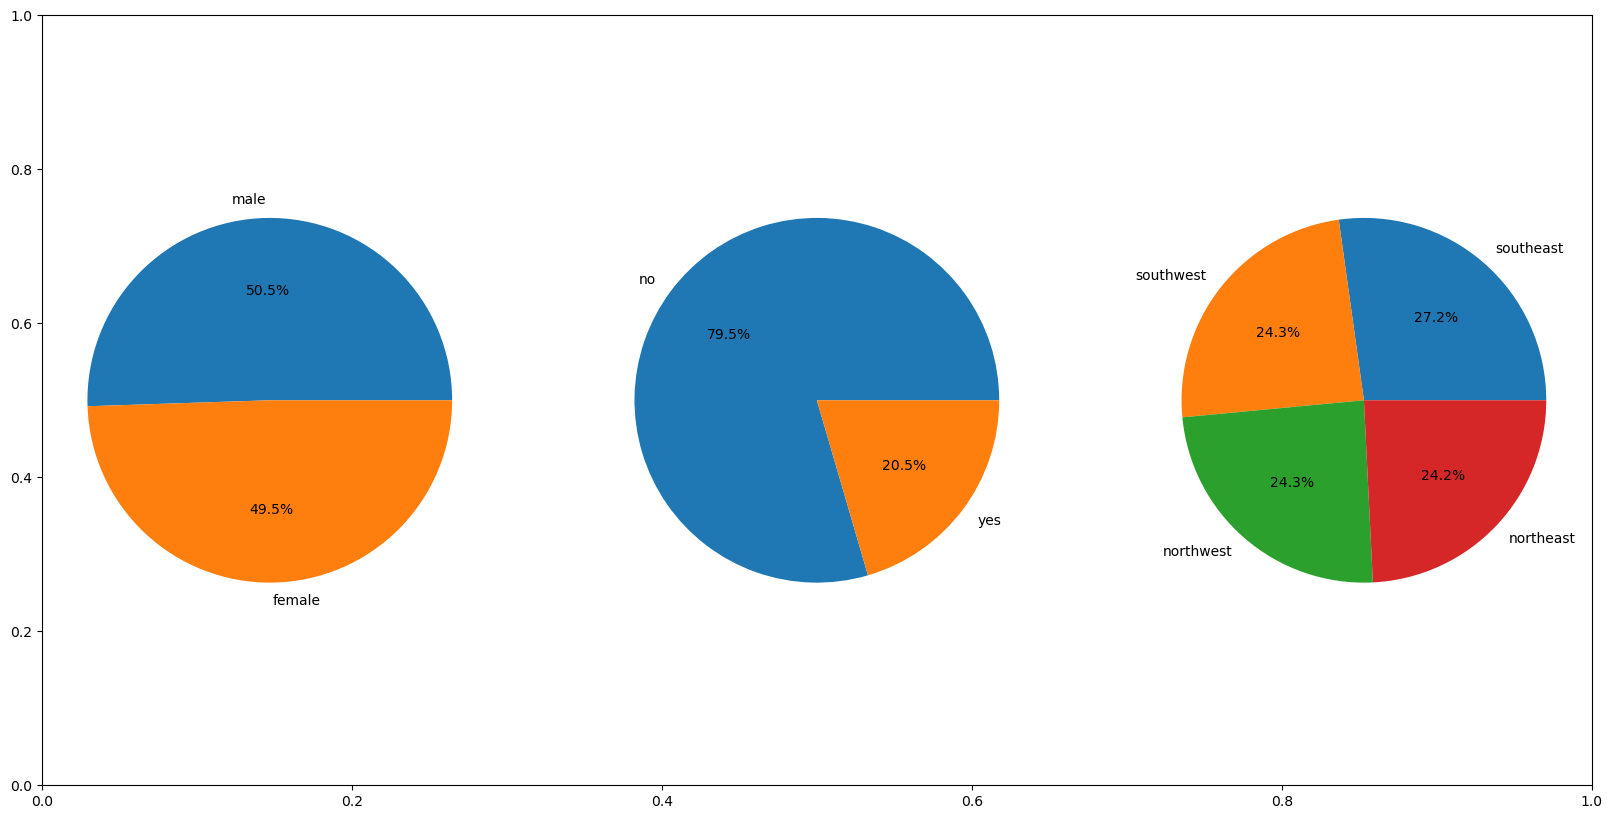

In [6]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

<Axes: ylabel='age'>

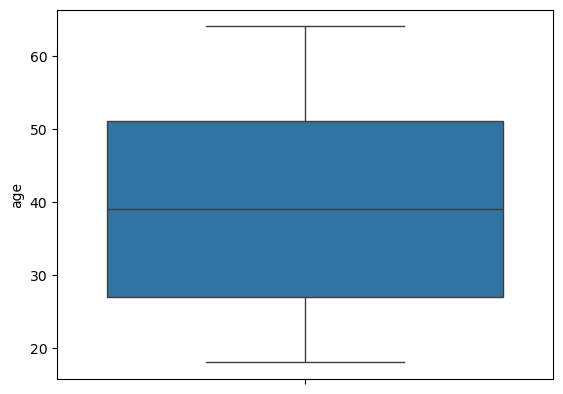

In [7]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

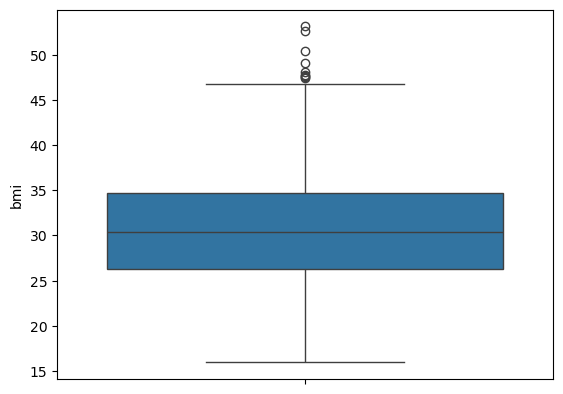

In [8]:
sns.boxplot(df['bmi'])

In [9]:
# Calculate the first, second, third quartile of the 'bmi' column
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.50)
Q3=df['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR=Q3-Q1 

# Define the lower bound and upper bound for outliers (any value this is considered an outlier)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

13.7
47.290000000000006


(1329, 7)


<Axes: ylabel='bmi'>

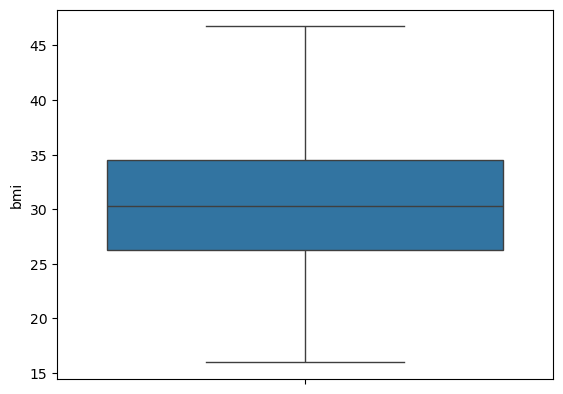

In [10]:
# Filter out outliers based on the lower and upper bounds
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Check the shape of the new DataFrame to see how many rows remain
print(df.shape)

# Check again for outliers
sns.boxplot(df['bmi'])

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'sex' and 'smoker'
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # female=0, male=1
df['smoker'] = le.fit_transform(df['smoker'])  # no=0, yes=1

# One-hot encoding for 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# df = df.replace({True: 1, False: 0})
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


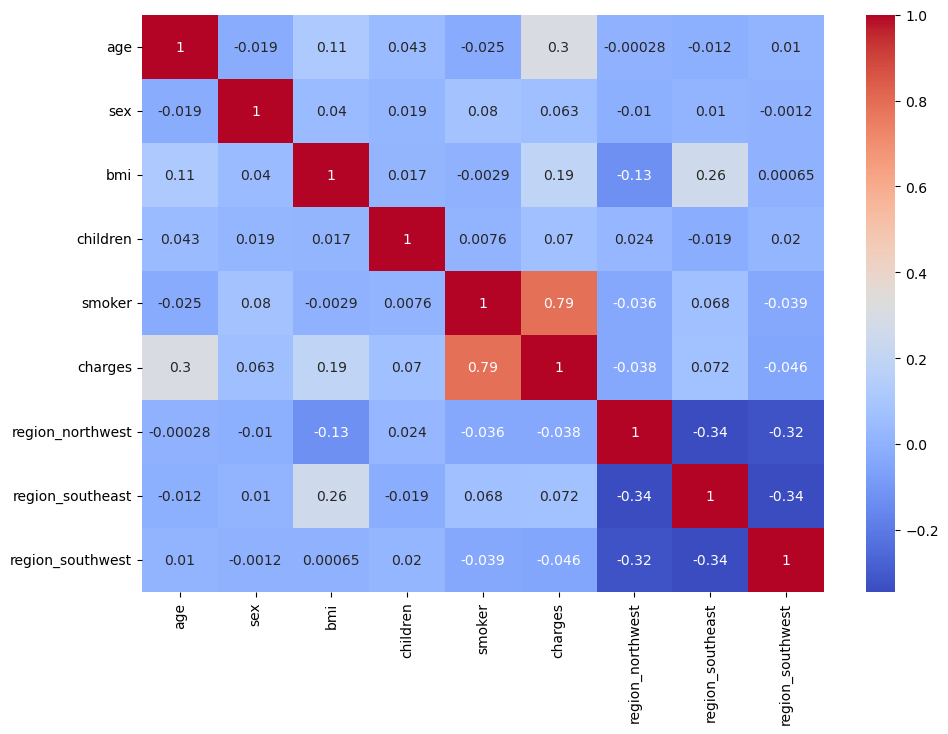

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (11,7.5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

### Split Data into Features and Target

In [14]:
x = df.drop('charges', axis = 1)
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.445670,-0.907940,1,False,False,True
1,-1.509976,1,0.546267,-0.079764,0,False,True,False
2,-0.797855,1,0.416149,1.576587,0,False,True,False
3,-0.441794,1,-1.323542,-0.907940,0,True,False,False
4,-0.513006,1,-0.280065,-0.907940,0,True,False,False


In [15]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Building

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define a dictionary with the models you want to try
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

# Loop over the models
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Predictions for test set
    y_pred_test = model.predict(x_test)
    
    # Predictions for train set (to calculate train accuracy)
    y_pred_train = model.predict(x_train)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)  # Train accuracy
    r2_test = r2_score(y_test, y_pred_test)  # Test accuracy
    
    # Cross-Validation Score
    cv_score = np.mean(cross_val_score(model, x, y, cv=5, scoring='r2'))  # Average R² score from CV
    
    # Store the results
    results[name] = {
        "Model": name,
        "Train Accuracy (R²)": r2_train,
        "Test Accuracy (R²)": r2_test,
        "MAE": mae,
        "MSE": mse,
        "CV Score (R²)": cv_score
    }

# Print out the performance of each model
for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  Train Accuracy: {metrics['Train Accuracy (R²)']}")
    print(f"  Test Accuracy: {metrics['Test Accuracy (R²)']}")
    print(f"  CV Score (R²): {metrics['CV Score (R²)']}\n")


Linear Regression Performance:
  MAE: 4084.9274845566615
  MSE: 34498730.946864165
  Train Accuracy: 0.7454367820598464
  Test Accuracy: 0.7671119511350495
  CV Score (R²): 0.7461299106571826

Decision Tree Performance:
  MAE: 3080.886418703007
  MSE: 44016186.762958996
  Train Accuracy: 0.9982776767777074
  Test Accuracy: 0.7028631612713698
  CV Score (R²): 0.6852304488992939

Random Forest Performance:
  MAE: 2631.7482219285944
  MSE: 25046677.79519435
  Train Accuracy: 0.9754341497834864
  Test Accuracy: 0.830919232036212
  CV Score (R²): 0.8330749391446121

Support Vector Regressor Performance:
  MAE: 8327.510818619909
  MSE: 162884531.4401294
  Train Accuracy: -0.09505160215743969
  Test Accuracy: -0.0995726415502105
  CV Score (R²): -0.10316347655617437

Gradient Boosting Performance:
  MAE: 2346.9525173339525
  MSE: 19704972.19857316
  Train Accuracy: 0.9011069090191972
  Test Accuracy: 0.8669790916271101
  CV Score (R²): 0.851856658868007



In [18]:
model.score(x_test,y_test)

0.8669790916271101

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
best_model

RandomForestRegressor(max_depth=10, n_estimators=200)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbr, 
                                   param_distributions=param_grid, 
                                   n_iter=50, # Number of combinations to try
                                   cv=5, # Cross-validation folds
                                   verbose=2, 
                                   n_jobs=-1, # Use all available cores
                                   random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
print("Best Parameters:", random_search.best_params_)
best_gbr = random_search.best_estimator_

# Evaluate the performance on the test set
y_pred = best_gbr.predict(x_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


### Model Evaluation

In [ ]:
# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
# Assuming 'model' is your trained model

# Collecting user input
age = int(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = int(input("Are you a smoker? (0 for No, 1 for Yes): "))

# For region, create a simple selection process
print("Select region:")
print("1. Northwest")
print("2. Southeast")
print("3. Southwest")

region = int(input("Enter the number corresponding to the region: "))

# Initialize region features
region_northwest = 0
region_southeast = 0
region_southwest = 0

# Assign the value to the appropriate region based on user input
if region == 1:
    region_northwest = 1
elif region == 2:
    region_southeast = 1
elif region == 3:
    region_southwest = 1

# Prepare input for prediction
input_data = [[age, sex, bmi, children, smoker, region_northwest, region_southeast, region_southwest]]

# Make prediction
prediction = model.predict(input_data)

# Output the predicted charges
print(f"Predicted medical insurance charges: Rs{prediction[0]}")